In [29]:
import chess
import chess.engine
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde




In [2]:
Path="/usr/local/Cellar/stockfish/16.1/bin/stockfish"
Engine_elo: int =1600

engine=chess.engine.SimpleEngine.popen_uci(Path)

engine.configure({"UCI_LimitStrength": True,"UCI_Elo":Engine_elo})



In [ ]:
def evaluate_move_limit(fen,move,ELO):
    # Path to Stockfish executable
    Path="/usr/local/Cellar/stockfish/16.1/bin/stockfish"
    # Engine Elo
    Engine_elo: int =ELO
    engine=chess.engine.SimpleEngine.popen_uci(Path)
    engine.configure({"UCI_LimitStrength": True,"UCI_Elo":Engine_elo})


    board = chess.Board(fen)
    board.push(chess.Move.from_uci(move))

    info = engine.analyse(board, chess.engine.Limit(time=1))  # Increased time limit for stability

    limit_score = info["score"].white().score(mate_score=10000)  # Get the POV score for White

    if not is_white_to_move:
        limit_score = -limit_score

    engine.quit()
    return limit_score
    # If it's Black to move, invert the score

evaluation = evaluate_move_limit(fen, move, elo)
print(f"Evaluation of the move {move} at ELO {elo}: {evaluation}")

In [12]:
evaluate_move_limit("r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 2 3","f3e5",1500)

251

In [25]:
import chess
import chess.engine

# Function to evaluate a move with a limited Elo version of Stockfish
def evaluate_move_limit(fen, move, elo):
    # Path to Stockfish executable
    path = "/usr/local/Cellar/stockfish/16.1/bin/stockfish"
    # Engine Elo
    engine_elo = elo
    
    # Create engine instance
    engine = chess.engine.SimpleEngine.popen_uci(path)
    engine.configure({"UCI_LimitStrength": True, "UCI_Elo": engine_elo})
    
    # Set up the board
    board = chess.Board(fen)
    move_obj = chess.Move.from_uci(move)
    
    # Evaluate the position after the move
    board.push(move_obj)
    result = engine.analyse(board, chess.engine.Limit(time=0.5))
    score = result['score'].relative.score()
    
    engine.quit()
    return score

# Function to evaluate a move with the full-strength Stockfish
def evaluate_move_full(fen, move):
    # Path to Stockfish executable
    path = "/usr/local/Cellar/stockfish/16.1/bin/stockfish"
    
    # Create engine instance
    engine = chess.engine.SimpleEngine.popen_uci(path)
    
    # Set up the board
    board = chess.Board(fen)
    move_obj = chess.Move.from_uci(move)
    
    # Evaluate the position after the move
    board.push(move_obj)
    result = engine.analyse(board, chess.engine.Limit(time=0.5))
    score = result['score'].relative.score()
    
    engine.quit()
    return score

# Example usage
fen = "2r2rk1/1bq2ppp/pp1bpn2/4N3/3P4/1P3N2/PB3PPP/2RQR1K1 w - - 0 18"
move = "f3g5"
elo = 1500

score_limit = evaluate_move_limit(fen, move, elo)
score_full = evaluate_move_full(fen, move)

print(f"Evaluation with limited Elo ({elo}): {score_limit}")
print(f"Evaluation with full-strength Stockfish: {score_full}")

# Comparison
difference = score_full - score_limit
print(f"Difference in evaluation: {difference}")


Evaluation with limited Elo (1500): 112
Evaluation with full-strength Stockfish: 118
Difference in evaluation: 6


Calculate the average difference in evaluation between your moves and the best moves according to the unrestricted Stockfish.

In [15]:

# Function to evaluate a position with a limited Elo version of Stockfish
def evaluate_position_limit(fen, elo):
    # Path to Stockfish executable
    path = "/usr/local/Cellar/stockfish/16.1/bin/stockfish"
    # Engine Elo
    engine_elo = elo
    
    # Create engine instance
    engine = chess.engine.SimpleEngine.popen_uci(path)
    engine.configure({"UCI_LimitStrength": True, "UCI_Elo": engine_elo})
    
    # Set up the board
    board = chess.Board(fen)
    
    # Evaluate the position
    result = engine.analyse(board, chess.engine.Limit(time=0.5))
    score = result['score'].relative.score()
    
    engine.quit()
    return score

# Function to evaluate a position with the full-strength Stockfish
def evaluate_position_full(fen):
    # Path to Stockfish executable
    path = "/usr/local/Cellar/stockfish/16.1/bin/stockfish"
    
    # Create engine instance
    engine = chess.engine.SimpleEngine.popen_uci(path)
    
    # Set up the board
    board = chess.Board(fen)
    
    # Evaluate the position
    result = engine.analyse(board, chess.engine.Limit(time=0.5))
    score = result['score'].relative.score()
    
    engine.quit()
    return score

# Function to evaluate the difference in scores before and after the move
def evaluate_move_difference(fen, move, elo):
    # Evaluate the position before the move
    score_before_limit = evaluate_position_limit(fen, elo)
    score_before_full = evaluate_position_full(fen)
    
    # Make the move on the board
    board = chess.Board(fen)
    move_obj = chess.Move.from_uci(move)
    board.push(move_obj)
    fen_after = board.fen()
    
    # Evaluate the position after the move
    score_after_limit = evaluate_position_limit(fen_after, elo)
    score_after_full = evaluate_position_full(fen_after)
    
    # Calculate the differences
    difference_limit = score_after_limit - score_before_limit
    difference_full = score_after_full - score_before_full
    
    return {
        'before_limit': score_before_limit,
        'after_limit': score_after_limit,
        'difference_limit': difference_limit,
        'before_full': score_before_full,
        'after_full': score_after_full,
        'difference_full': difference_full
    }

# Example usage
fen = "2r2rk1/1bq2ppp/pp1bpn2/4N3/3P4/1P3N2/PB3PPP/2RQR1K1 w - - 0 18"
move = "f3g5"
elo = 1500

evaluation_results = evaluate_move_difference(fen, move, elo)

print("Evaluation results with limited Elo Stockfish:")
print(f"Before move: {evaluation_results['before_limit']}")
print(f"After move: {evaluation_results['after_limit']}")
print(f"Difference: {evaluation_results['difference_limit']}")

print("\nEvaluation results with full-strength Stockfish:")
print(f"Before move: {evaluation_results['before_full']}")
print(f"After move: {evaluation_results['after_full']}")
print(f"Difference: {evaluation_results['difference_full']}")


Evaluation results with limited Elo Stockfish:
Before move: 401
After move: 104
Difference: -297

Evaluation results with full-strength Stockfish:
Before move: 410
After move: 118
Difference: -292


In [ ]:
#Stockfish at differing elo functions



In [8]:
def get_moves_by_elo(fen,elos):
    Path="/usr/local/Cellar/stockfish/16.1/bin/stockfish"
    moves_by_elo={}

    for elo in elos:
        engine=chess.engine.SimpleEngine.popen_uci(Path)
        engine.configure({"UCI_LimitStrength": True,"UCI_Elo":elo})
        board=chess.Board(fen)
        info=engine.analyse(board,chess.engine.Limit(time=1))
        moves_by_elo[elo]=info["pv"][0]

        engine.quit()
    return moves_by_elo

fen = "r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 2 3"
#Elos does not go under 1320 or above 3190
elos = [1400, 1600, 1800, 2000]

moves_by_elo = get_moves_by_elo(fen, elos)

for elo, move in moves_by_elo.items():
    print(f"Elo {elo}: {move}")

Elo 1400: f1c4
Elo 1600: f1c4
Elo 1800: f1b5
Elo 2000: d2d4


In [27]:


# Function to determine multiple best moves for different Elo levels
def get_top_moves_by_elo(fen, elos, num_moves):
    path = "/usr/local/Cellar/stockfish/16.1/bin/stockfish"
    moves_by_elo = {}

    for elo in elos:
        engine = chess.engine.SimpleEngine.popen_uci(path)
        engine.configure({"UCI_LimitStrength": True, "UCI_Elo": elo})

        # Set up the board
        board = chess.Board(fen)

        # Get multiple best moves
        info = engine.analyse(board, chess.engine.Limit(time=1), multipv=num_moves)
        best_moves = [entry['pv'][0].uci() for entry in info]

        # Store the best moves for the current Elo
        moves_by_elo[elo] = best_moves

        engine.quit()

    return moves_by_elo

# Example usage
fen = "r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 2 3"
# Elos do not go under 1320 or above 3190
elos = [1400, 1600, 1800, 2000]
num_moves = 3

moves_by_elo = get_top_moves_by_elo(fen, elos, num_moves)

print("Top moves for different Elo levels:")
for elo, moves in moves_by_elo.items():
    print(f"Elo {elo}: {moves}")


Top moves for different Elo levels:
Elo 1400: ['f1c4', 'f1b5', 'b1c3']
Elo 1600: ['f1b5', 'f1c4', 'd2d4']
Elo 1800: ['f1b5', 'b1c3', 'f1c4']
Elo 2000: ['f1b5', 'f1c4', 'd2d4']


In [24]:
def distribution_plot(data1, data2=None, label1='Data 1', label2='Data 2', xlabel='Scores', ylabel='Probability Density', title='Non-Parametric Probability Distribution (KDE)', color1='skyblue', color2='pink'):
    # Create KDE
    if data2 is None:
        kde = gaussian_kde(data1, bw_method=0.5)
        
        # Evaluate KDE on a grid
        x_grid = np.linspace(min(data1), max(data1), 1000)
        kde_values = kde(x_grid)
        
        # Plot KDE
        sns.kdeplot(data1, bw_adjust=0.5, fill=True, color=color1)

        
        # Set plot labels and title
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()

        return x_grid, kde_values
    
    else:
        kde1 = gaussian_kde(data1, bw_method=0.5)
        kde2 = gaussian_kde(data2, bw_method=0.5) 
        
        # Evaluate KDE on a grid
        x_grid1 = np.linspace(min(data1), max(data1), 1000)
        x_grid2 = np.linspace(min(data2), max(data2), 1000) 
        kde_values1 = kde1(x_grid1)
        kde_values2 = kde2(x_grid2)
        
        # Plot KDE
        sns.kdeplot(data1, bw_adjust=0.5, fill=True, color=color1)
        sns.kdeplot(data2, bw_adjust=0.5, fill=True, color=color2) 

        
        # Set plot labels and title
        plt.xlabel('Values')
        plt.ylabel('Probability Density')
        plt.title('Non-Parametric Probability Distribution (KDE)')
        plt.legend([label1, label2]) 
        return x_grid1, kde_values1, x_grid2, kde_values2

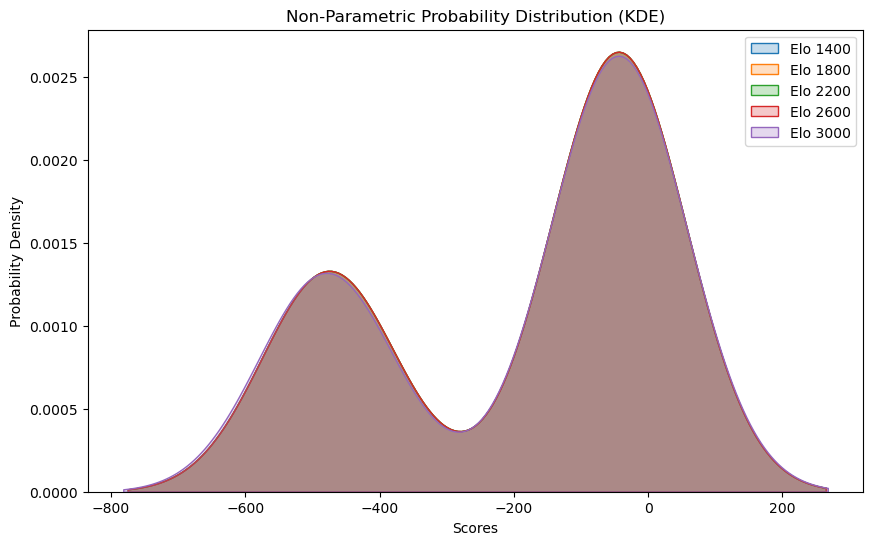

In [42]:
import chess
import chess.engine
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Path to Stockfish executable
path = "/usr/local/Cellar/stockfish/16.1/bin/stockfish"

# Function to evaluate legal moves with full-strength Stockfish
def evaluate_legal_moves(fen):
    engine = chess.engine.SimpleEngine.popen_uci(path)
    board = chess.Board(fen)
    legal_moves = list(board.legal_moves)
    move_scores = {}

    for move in legal_moves:
        board.push(move)
        info = engine.analyse(board, chess.engine.Limit(time=1))
        move_scores[move.uci()] = info['score'].relative.score()
        board.pop()

    engine.quit()
    return move_scores

# Function to determine the move scores for different Elo levels
def get_move_scores_by_elo(fens, elos):
    scores_by_elo = {elo: [] for elo in elos}

    for fen in fens:
        legal_move_scores = evaluate_legal_moves(fen)

        for elo in elos:
            engine = chess.engine.SimpleEngine.popen_uci(path)
            engine.configure({"UCI_LimitStrength": True, "UCI_Elo": elo})

            board = chess.Board(fen)
            info = engine.analyse(board, chess.engine.Limit(time=1), multipv=1)
            best_move = info[0]['pv'][0].uci()
            scores_by_elo[elo].append(legal_move_scores[best_move])

            engine.quit()

    return scores_by_elo

# Function to create distribution plots
def distribution_plot(data, xlabel='Scores', ylabel='Probability Density', title='Non-Parametric Probability Distribution (KDE)'):
    plt.figure(figsize=(10, 6))
    
    for elo, scores in data.items():
        kde = gaussian_kde(scores, bw_method=0.5)
        x_grid = np.linspace(min(scores), max(scores), 1000)
        kde_values = kde(x_grid)
        
        # Plot KDE
        sns.kdeplot(scores, bw_adjust=0.5, fill=True, label=f'Elo {elo}')

    # Set plot labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage
fens = [
    "r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 2 3",
    "rnbqkb1r/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1",
    "r2qkbnr/ppp2ppp/2n5/2bpP3/8/5N2/PPP2PPP/RNBQKB1R w KQkq - 0 5"
]
# Elos do not go under 1320 or above 3190
elos = [1400, 1800, 2200, 2600, 3000]

scores_by_elo = get_move_scores_by_elo(fens, elos)

# Create distribution plot
distribution_plot(scores_by_elo)


In [1]:
import chess
import chess.engine
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Path to Stockfish executable
path = "/usr/local/Cellar/stockfish/16.1/bin/stockfish"

# Function to evaluate legal moves with full-strength Stockfish
def evaluate_legal_moves(fen):
    engine = chess.engine.SimpleEngine.popen_uci(path)
    board = chess.Board(fen)
    legal_moves = list(board.legal_moves)
    move_scores = {}

    for move in legal_moves:
        board.push(move)
        info = engine.analyse(board, chess.engine.Limit(time=1))
        move_scores[move.uci()] = info['score'].relative.score()
        board.pop()

    engine.quit()
    return move_scores

# Function to determine the move scores for different Elo levels
def get_move_scores_by_elo(fens, elos):
    scores_by_elo = {elo: [] for elo in elos}
    all_legal_move_scores = []

    for fen in fens:
        legal_move_scores = evaluate_legal_moves(fen)
        all_legal_move_scores.extend(legal_move_scores.values())

        for elo in elos:
            engine = chess.engine.SimpleEngine.popen_uci(path)
            engine.configure({"UCI_LimitStrength": True, "UCI_Elo": elo})

            board = chess.Board(fen)
            info = engine.analyse(board, chess.engine.Limit(time=1), multipv=1)
            best_move = info['pv'][0].uci()
            scores_by_elo[elo].append(legal_move_scores[best_move])

            engine.quit()

    return scores_by_elo, all_legal_move_scores

# Function to create distribution plots
def distribution_plot(data, reference_data, xlabel='Scores', ylabel='Probability Density', title='Non-Parametric Probability Distribution (KDE)'):
    plt.figure(figsize=(10, 6))

    # Plot the reference distribution
    kde_reference = gaussian_kde(reference_data, bw_method=0.5)
    x_grid = np.linspace(min(reference_data), max(reference_data), 1000)
    kde_reference_values = kde_reference(x_grid)
    sns.lineplot(x=x_grid, y=kde_reference_values, color='grey', label='Full-strength Stockfish')

    for elo, scores in data.items():
        kde = gaussian_kde(scores, bw_method=0.5)
        x_grid = np.linspace(min(scores), max(scores), 1000)
        kde_values = kde(x_grid)
        
        # Plot KDE
        sns.lineplot(x=x_grid, y=kde_values, label=f'Elo {elo}')

    # Set plot labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage
fens = [
    "r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 2 3",
    "rnbqkb1r/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1",
    "r2qkbnr/ppp2ppp/2n5/2bpP3/8/5N2/PPP2PPP/RNBQKB1R w KQkq - 0 5"
]
# Elos do not go under 1320 or above 3190
elos = [1400, 1600, 1800, 2000]

scores_by_elo, all_legal_move_scores = get_move_scores_by_elo(fens, elos)

# Create distribution plot
distribution_plot(scores_by_elo, all_legal_move_scores)


TypeError: list indices must be integers or slices, not str

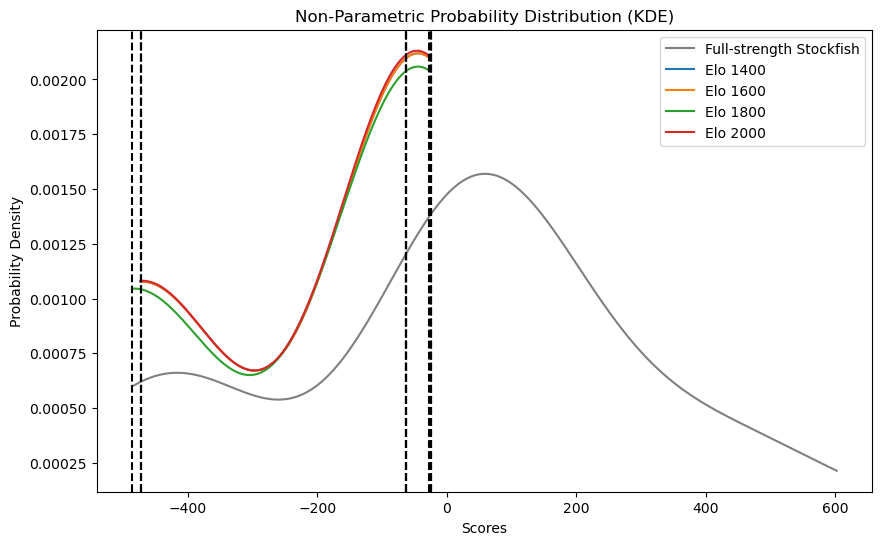

In [2]:
import chess
import chess.engine
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Path to Stockfish executable
path = "/usr/local/Cellar/stockfish/16.1/bin/stockfish"

# Function to evaluate legal moves with full-strength Stockfish
def evaluate_legal_moves(fen):
    engine = chess.engine.SimpleEngine.popen_uci(path)
    board = chess.Board(fen)
    legal_moves = list(board.legal_moves)
    move_scores = {}

    for move in legal_moves:
        board.push(move)
        info = engine.analyse(board, chess.engine.Limit(time=1))
        move_scores[move.uci()] = info['score'].relative.score()
        board.pop()

    engine.quit()
    return move_scores

# Function to determine the move scores for different Elo levels
def get_move_scores_by_elo(fens, elos):
    scores_by_elo = {elo: [] for elo in elos}
    all_legal_move_scores = []

    for fen in fens:
        legal_move_scores = evaluate_legal_moves(fen)
        all_legal_move_scores.extend(legal_move_scores.values())

        for elo in elos:
            engine = chess.engine.SimpleEngine.popen_uci(path)
            engine.configure({"UCI_LimitStrength": True, "UCI_Elo": elo})

            board = chess.Board(fen)
            info = engine.analyse(board, chess.engine.Limit(time=1))
            best_move = info['pv'][0].uci()
            scores_by_elo[elo].append(legal_move_scores[best_move])

            engine.quit()

    return scores_by_elo, all_legal_move_scores

# Function to create distribution plots
def distribution_plot(data, reference_data, xlabel='Scores', ylabel='Probability Density', title='Non-Parametric Probability Distribution (KDE)'):
    plt.figure(figsize=(10, 6))

    # Plot the reference distribution
    kde_reference = gaussian_kde(reference_data, bw_method=0.5)
    x_grid = np.linspace(min(reference_data), max(reference_data), 1000)
    kde_reference_values = kde_reference(x_grid)
    sns.lineplot(x=x_grid, y=kde_reference_values, color='grey', label='Full-strength Stockfish')

    for elo, scores in data.items():
        kde = gaussian_kde(scores, bw_method=0.5)
        x_grid = np.linspace(min(scores), max(scores), 1000)
        kde_values = kde(x_grid)
        
        # Plot KDE
        sns.lineplot(x=x_grid, y=kde_values, label=f'Elo {elo}')

        # Mark the chosen moves in the distribution
        for score in scores:
            plt.axvline(score, color='black', linestyle='--')

    # Set plot labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage
fens = [
    "r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 2 3",
    "rnbqkb1r/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1",
    "r2qkbnr/ppp2ppp/2n5/2bpP3/8/5N2/PPP2PPP/RNBQKB1R w KQkq - 0 5"
]
# Elos do not go under 1320 or above 3190
elos = [1400, 1600, 1800, 2000]

scores_by_elo, all_legal_move_scores = get_move_scores_by_elo(fens, elos)

# Create distribution plot
distribution_plot(scores_by_elo, all_legal_move_scores)


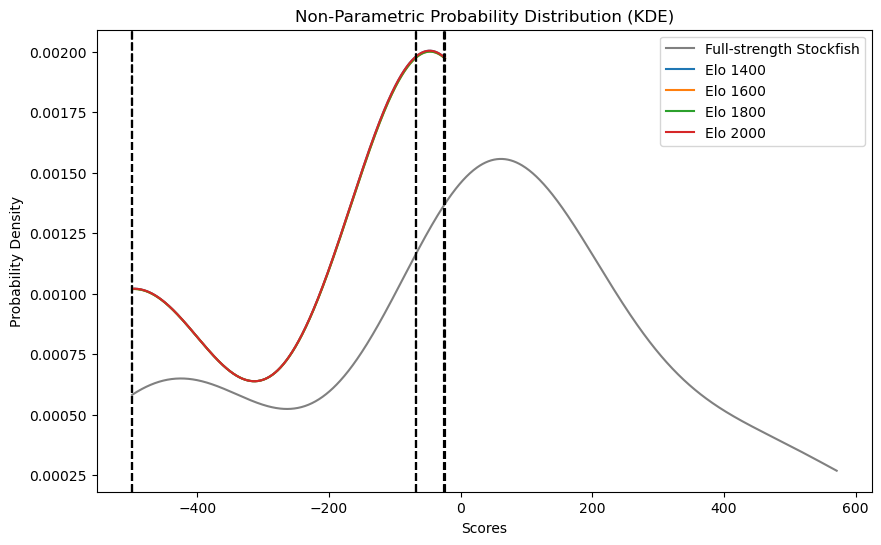

In [3]:
import chess
import chess.engine
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Path to Stockfish executable
path = "/usr/local/Cellar/stockfish/16.1/bin/stockfish"

# Function to evaluate legal moves with full-strength Stockfish
def evaluate_legal_moves(fen):
    engine = chess.engine.SimpleEngine.popen_uci(path)
    board = chess.Board(fen)
    legal_moves = list(board.legal_moves)
    move_scores = {}

    for move in legal_moves:
        board.push(move)
        info = engine.analyse(board, chess.engine.Limit(time=1))
        move_scores[move.uci()] = info['score'].relative.score()
        board.pop()

    engine.quit()
    return move_scores

# Function to determine the move scores for different Elo levels
def get_move_scores_by_elo(fens, elos):
    scores_by_elo = {elo: [] for elo in elos}
    all_legal_move_scores = []

    for fen in fens:
        legal_move_scores = evaluate_legal_moves(fen)
        all_legal_move_scores.extend(legal_move_scores.values())

        for elo in elos:
            engine = chess.engine.SimpleEngine.popen_uci(path)
            engine.configure({"UCI_LimitStrength": True, "UCI_Elo": elo})

            board = chess.Board(fen)
            info = engine.analyse(board, chess.engine.Limit(time=1))
            best_move = info['pv'][0].uci()
            scores_by_elo[elo].append(legal_move_scores[best_move])

            engine.quit()

    return scores_by_elo, all_legal_move_scores

# Function to create distribution plots
def distribution_plot(data, reference_data, xlabel='Scores', ylabel='Probability Density', title='Non-Parametric Probability Distribution (KDE)'):
    plt.figure(figsize=(10, 6))

    # Plot the reference distribution
    kde_reference = gaussian_kde(reference_data, bw_method=0.5)
    x_grid = np.linspace(min(reference_data), max(reference_data), 1000)
    kde_reference_values = kde_reference(x_grid)
    sns.lineplot(x=x_grid, y=kde_reference_values, color='grey', label='Full-strength Stockfish')

    for elo, scores in data.items():
        kde = gaussian_kde(scores, bw_method=0.5)
        x_grid = np.linspace(min(scores), max(scores), 1000)
        kde_values = kde(x_grid)
        
        # Plot KDE
        sns.lineplot(x=x_grid, y=kde_values, label=f'Elo {elo}')

        # Mark the chosen moves in the distribution
        for score in scores:
            plt.axvline(score, color='black', linestyle='--')

    # Set plot labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage
fens = [
    "r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 2 3",
    "rnbqkb1r/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1",
    "r2qkbnr/ppp2ppp/2n5/2bpP3/8/5N2/PPP2PPP/RNBQKB1R w KQkq - 0 5"
]
# Elos do not go under 1320 or above 3190
elos = [1400, 1600, 1800, 2000]

scores_by_elo, all_legal_move_scores = get_move_scores_by_elo(fens, elos)

# Create distribution plot
distribution_plot(scores_by_elo, all_legal_move_scores)
